In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

df = pd.read_csv(r'winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
#DIVIDING THE DATASET
#select 75% of the data
train_df = df.sample(frac=0.75, random_state=4)
#drops the training data from the original dataframe
val_df = df.drop(train_df.index)

In [3]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range

In [4]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

'''We'll need to pass the shape of features/inputs as an argument
in our model, so let's define a variable to save it.'''
input_shape = [X_train.shape[1]]
input_shape

[11]

In [5]:
#CREATING A LINEAR MODEL NEURAL NETWORK
model = tf.keras.Sequential([
#tf.keras.layers.Dense(units=64,activation='relu',input_shape=input_shape),
#tf.keras.layers.Dense(units=64, activation='relu'),
tf.keras.layers.Dense(units=64,activation='sigmoid',input_shape=input_shape),
tf.keras.layers.Dense(units=64, activation='sigmoid'),
tf.keras.layers.Dense(units=1)
])

# after you create your model it's
# always a good habit to print out it's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [6]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',
			
			# MAE error is good for
			# numerical predictions
			loss='mae')

In [12]:
#TRAINING THE MODEL
losses = model.fit(X_train, y_train,

				validation_data=(X_val, y_val),
					
				# it will use 'batch_size' number
				# of examples per example
				batch_size=256,
				epochs=5, # total epoch
				)

Epoch 1/5
5/5 [==============================] - 0s 20ms/step - loss: 0.1236 - val_loss: 0.1245
Epoch 2/5
5/5 [==============================] - 0s 14ms/step - loss: 0.1227 - val_loss: 0.1246
Epoch 3/5
5/5 [==============================] - 0s 12ms/step - loss: 0.1226 - val_loss: 0.1238
Epoch 4/5
5/5 [==============================] - 0s 17ms/step - loss: 0.1221 - val_loss: 0.1241
Epoch 5/5
5/5 [==============================] - 0s 11ms/step - loss: 0.1217 - val_loss: 0.1229


In [13]:
#GENERATE PREDICTIONS AND ANALYSE ACCURACY
'''this will pass the first 3 rows of features of our data as 
input to make predictions'''
model.predict(X_val.iloc[0:3, :])


1/1 [==============================] - 0s 32ms/step


array([[0.5179571 ],
       [0.55006367],
       [0.52276945]], dtype=float32)

In [14]:
#COMPARING PREDICTION WITH DESIRED VALUE
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

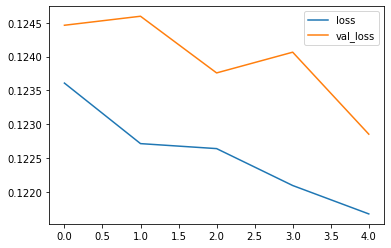

In [15]:
#VISUALIZING
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val loss in each epoch

''' loss_df is a dataframe which contains the losses so we can
plot it to visualize our model training '''
loss_df.loc[:,['loss','val_loss']].plot()
